<a href="https://colab.research.google.com/github/saeahgo/Algorithms-and-Complexity/blob/main/Machine%20Learning%20HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: This HW is based on the code for Multiple Variable Linear Regression

## Instructions:

Place the answer to your code only in the area specified. Also, make sure to run all your code (e.g., if you are running the code on your local machine, press >> to "Restart Kernel and Run All Cells"). This should plot all outputs including your answers to homework questions. After this, go to file (top left) and select "Print". Save your file as a PDF and upload the PDF to Canvas. This is one way to generate a PDF. You can also search for other methods to generate a PDF from Jupyter.

In [1]:
import numpy as np # linear algebra operation
import matplotlib # plotting
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline is a magic function that makes plots appear next to code and be stored in notebook:
https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline

## Diabetes Data Example
To illustrate the concepts, we load the well-known diabetes data set.  This dataset is included in the `sklearn.datasets` module and can be loaded as follows.

In [2]:
from sklearn import datasets, linear_model # scikit learn - ml package

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

We can print a description of the data as follows:

In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

The target values are stored in the vector `y`.  The attributes for the diabetes data are stored in a data matrix, `X`.  The size is is number of samples (442) x number of attributes (10).

In [4]:
nsamp, natt = X.shape
print("num samples={0:d}  num attributes={1:d}".format(nsamp,natt))

num samples=442  num attributes=10


In the code above, we use the fromat method to help with output formatting. You use {} to indicate
where the output would be substituted and you provide the variable to be used inside the format method, see more:
https://docs.python.org/3/tutorial/inputoutput.html

## Question 1 (2 points):
Print the ages of the first five subjects?

In [5]:
import pandas as pd

# Create a DataFrame for easier visualization
X = pd.DataFrame(X, columns=diabetes.feature_names)

print(X['age'].head(5))

0    0.038076
1   -0.001882
2    0.085299
3   -0.089063
4    0.005383
Name: age, dtype: float64


## Question 2 (2 points):
Print the attributes S1-S3 for subjects 10-15

In [6]:
# specify the columns s1-s3 we want to see
cols_to_display = ['s1', 's2', 's3']

print(X.loc[10:15, cols_to_display])

          s1        s2        s3
10 -0.103389 -0.090561 -0.013948
11 -0.007073  0.045972 -0.065491
12 -0.004321 -0.009769  0.044958
13 -0.004321 -0.015719 -0.002903
14  0.017694 -0.000061  0.081775
15  0.089244  0.107662 -0.039719


## Question 3 (2 points):
Create a scatter plot of the target variable, `y` vs. the BMI.  Does there seem to be a relation?  What about `y` vs. the age?  Which is a better predictor?  

In [7]:
min_value = X['bmi'].min()
max_value = X['bmi'].max()
print(min_value, max_value)

-0.09027529589850945 0.17055522598064407


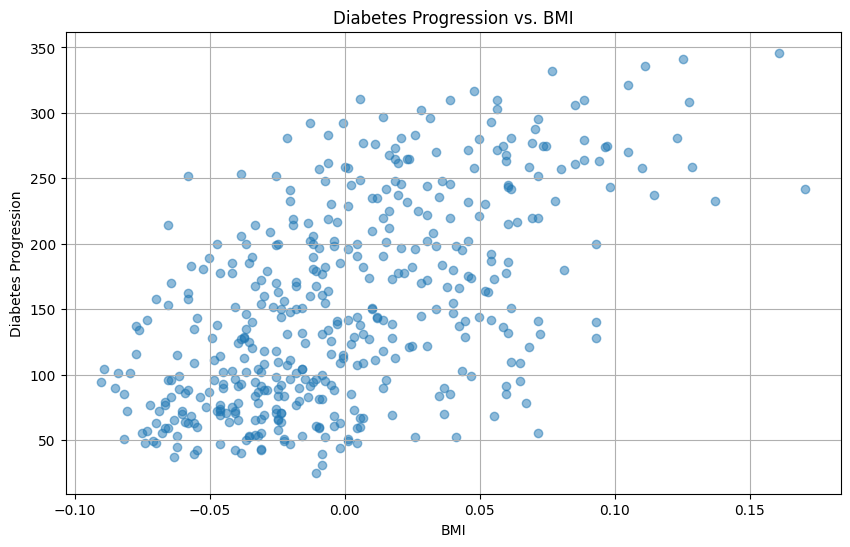

In [8]:
# create a scatter plot of y vs. BMI
plt.figure(figsize=(10, 6))
plt.scatter(X['bmi'], y, alpha=0.5)
plt.title('Diabetes Progression vs. BMI')
plt.xlabel('BMI')
plt.ylabel('Diabetes Progression')
plt.grid()
plt.show()

Even though there are some noises, lots of datapoints shows linear relationship. I would say there seems to be a relation.

In [9]:
# just checking age range myself
min_value = X['age'].min()
max_value = X['age'].max()
print(min_value, max_value)

-0.1072256316073538 0.11072667545381144


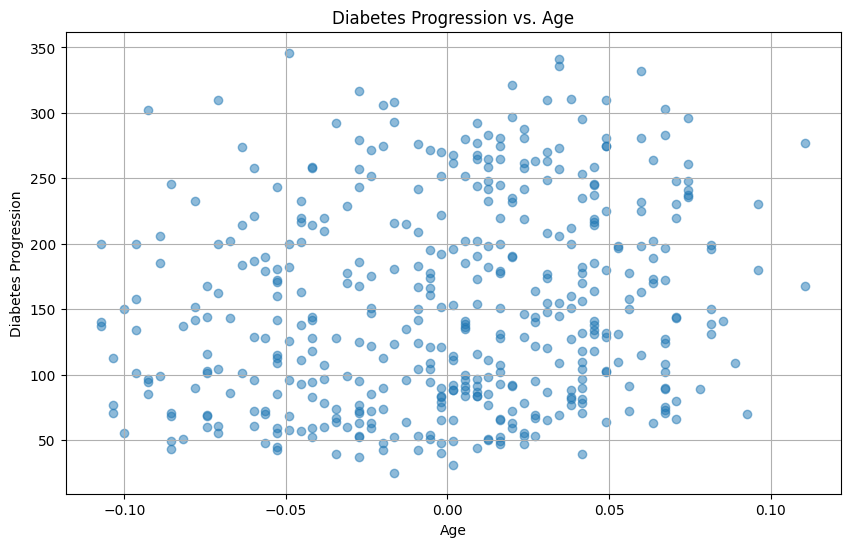

In [10]:
# similarly, create a scatter plot of y vs. age
plt.figure(figsize=(10, 6))
plt.scatter(X['age'], y, alpha=0.5)
plt.title('Diabetes Progression vs. Age')
plt.xlabel('Age')
plt.ylabel('Diabetes Progression')
plt.grid()
plt.show()

We hardly see a pattern with the age predictor compared to BMI predictor. So I would say BMI is a better predictor compared to age.

## Question 4 (2 points):

You are given target values `y` and features `x1` and `x2` below.  Fit the model on the first 4 data points and test the model on the fifth data point.  You may want to use the following steps

*  Construct the training training data `X_tr,y_tr`
*  Create a regression object `regr = linear_model.LinearRegression()`
*  Fit the model with the `regr.fit()` method
*  Predict the value on the test value with the `regr.predict()`

In [11]:
x1 = np.array([0,1,3,5,4])
x2 = np.array([0,0.7, 4.3, 15.1, 13.2])
y = np.array([-2, -0.9, 1.5, 18, 13])

In [12]:
# construct the training data (X_tr, y_tr) using the first four data points
X_tr = np.column_stack((x1[:4], x2[:4]))  # Stack x1 and x2 for training
y_tr = y[:4]

# prepare the test data (the fifth data point)
X_test = np.array([[x1[4], x2[4]]])  # Shape (1, 2)

# create a regression object
regr = linear_model.LinearRegression()

# fit the model
regr.fit(X_tr, y_tr)

# predict the value for the test data
y_pred = regr.predict(X_test)

# print the predicted value
print(f"Predicted value on the test value is: {y_pred[0]}")

Predicted value on the test value is: 15.981708278580818


## Question 5 (2 points):
Describe the 1SE rule in cross validation and how the model order is selected based on the value of fitness score, i.e., whether a higher or lower firness score is desired and how the model order is determined.